# **Price Prediction with US Real Estate Analysis and Machine Learning**
### **Dataset** : This dataset contains listings of Real Estate in the USA broken bt State and zip code.

### **What you can expect**
* Detection and cleaning of missing data from data
* Data visualization and data analysis with matplotlib and seaborn
* Creation of training and test data
* Making predictions with machine learning algorithms
* Scoring of predictive values

### **Columns**
* status
* price
* bed
* bath
* acre_lot
* full_address
* street
* city
* state
* zip_code
* house_size
* sold_date


## **Import Libraries**

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



## **Data Processing**

In [11]:
Data = pd.read_csv("realtor-data.csv")


In [ ]:
Data.isnull().sum()

status               0
price                0
bed              87272
bath             85759
acre_lot         75301
full_address         0
street             197
city                52
state                0
zip_code           197
house_size       83182
sold_date       264932
dtype: int64

In [ ]:
Data.dropna(inplace = True)

In [5]:
Data.duplicated(subset="full_address")

829       False
3380       True
5083       True
5387       True
9053       True
          ...  
402152     True
402153     True
402154     True
402155     True
402158    False
Length: 105614, dtype: bool

In [6]:
Data.drop_duplicates(subset=['full_address'], inplace = True)
Data.index = np.arange(Data.index.size)

In [7]:
Data.head(n = -20)

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
1,for_sale,950000.0,5.0,4.0,0.99,"46 Water Isle, Saint Thomas, VI, 00802",46 Water Isle,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11
2,for_sale,6899000.0,4.0,6.0,0.83,"10 Water Isle, Saint Thomas, VI, 00802",10 Water Isle,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05
3,for_sale,525000.0,3.0,3.0,0.45,"955 River Rd, Agawam, MA, 01001",955 River Rd,Agawam,Massachusetts,1001.0,2314.0,2014-06-25
4,for_sale,289900.0,3.0,2.0,0.36,"82 Harvey Johnson Dr, Agawam, MA, 01001",82 Harvey Johnson Dr,Agawam,Massachusetts,1001.0,1276.0,2012-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...
9753,for_sale,364900.0,2.0,2.0,0.35,"258 Sentinel Hill Rd, Derby, CT, 06418",258 Sentinel Hill Rd,Derby,Connecticut,6418.0,1740.0,2008-05-06
9754,for_sale,575000.0,5.0,4.0,1.46,"56 Ox Bow Ln, Woodbridge, CT, 06525",56 Ox Bow Ln,Woodbridge,Connecticut,6525.0,3500.0,2021-10-29
9755,for_sale,170000.0,3.0,2.0,0.12,"32 Westerman Ave, Seymour, CT, 06483",32 Westerman Ave,Seymour,Connecticut,6483.0,898.0,2009-12-23
9756,for_sale,360000.0,3.0,2.0,0.17,"28 Tuxedo Ave, Shelton, CT, 06484",28 Tuxedo Ave,Shelton,Connecticut,6484.0,1182.0,1999-08-27


## **Visualization and Analysis of Data**

In [8]:
plt.style.use('default')

Text(0, 0.5, 'Number')

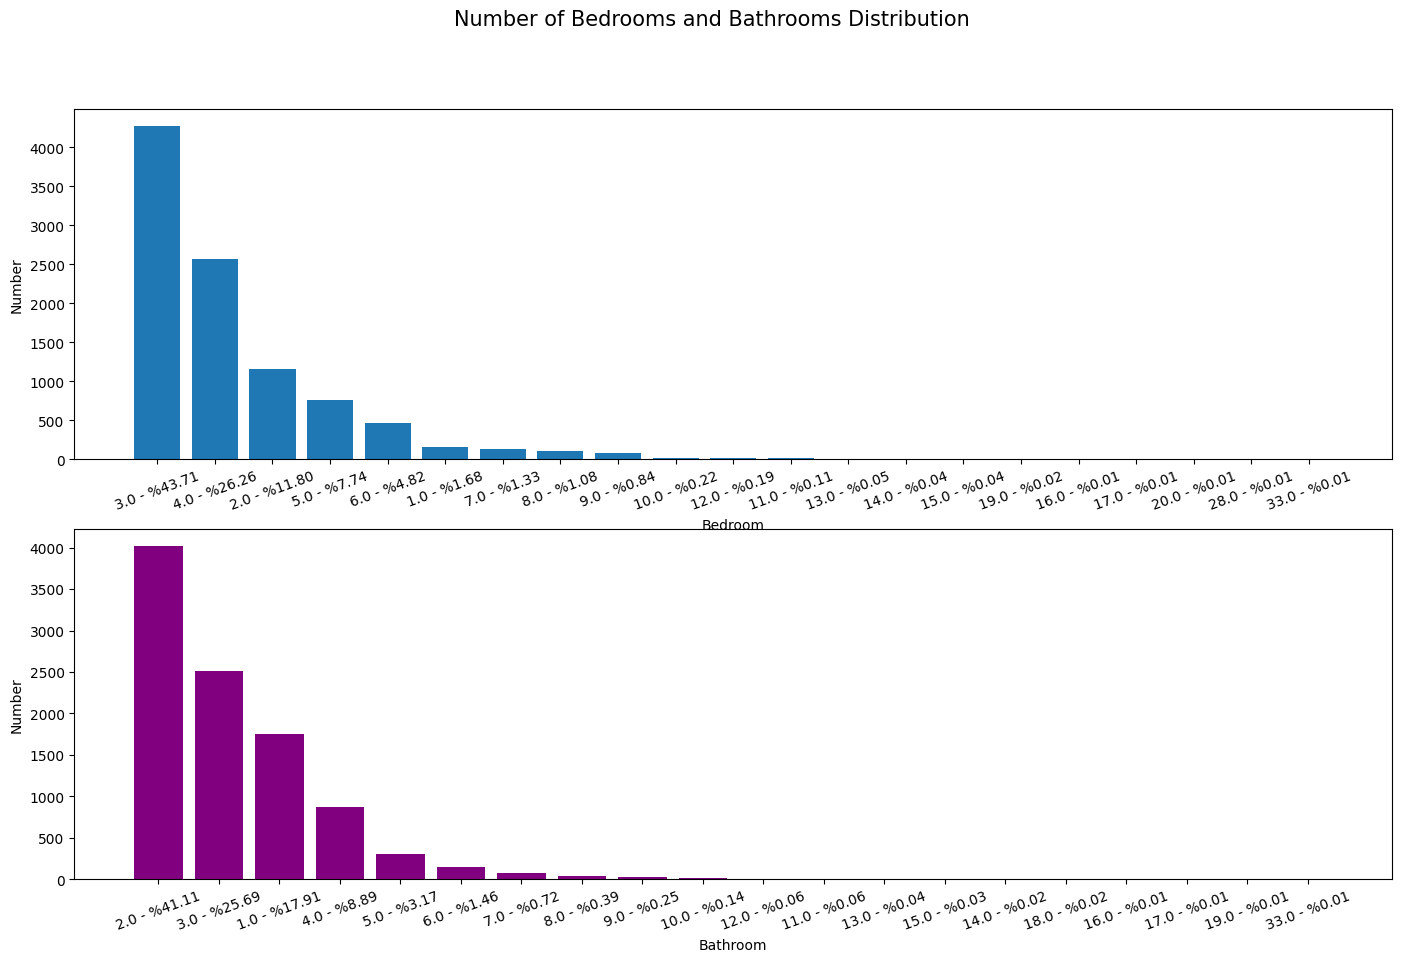

In [9]:
plt.figure(figsize=(17, 10))
plt.suptitle("Number of Bedrooms and Bathrooms Distribution", fontsize = 15)

# # # # # # # # # # # # # # # # # # # # # # # # Bedroom

bed = Data.value_counts("bed")
labels = list()
for i, j in enumerate(bed):
    labels.append("{} - %{:.2f}".format(bed.index[i], 100*j/bed.sum()))
    
plt.subplot(2,1,1)
plt.bar(labels, bed)
plt.xticks(rotation = 20)
plt.xlabel("Bedroom")
plt.ylabel("Number")

# # # # # # # # # # # # # # # # # # # # # # # # Bathroom

bath = Data.value_counts("bath")
labels = list()
for i, j in enumerate(bath):
    labels.append("{} - %{:.2f}".format(bath.index[i], 100*j/bath.sum()))
    
plt.subplot(2,1,2)
plt.bar(labels, bath, color = "purple")
plt.xticks(rotation = 20)
plt.xlabel("Bathroom")
plt.ylabel("Number")


Text(0.5, 1.0, 'Relation of Price to Bedroom and Bathroom')

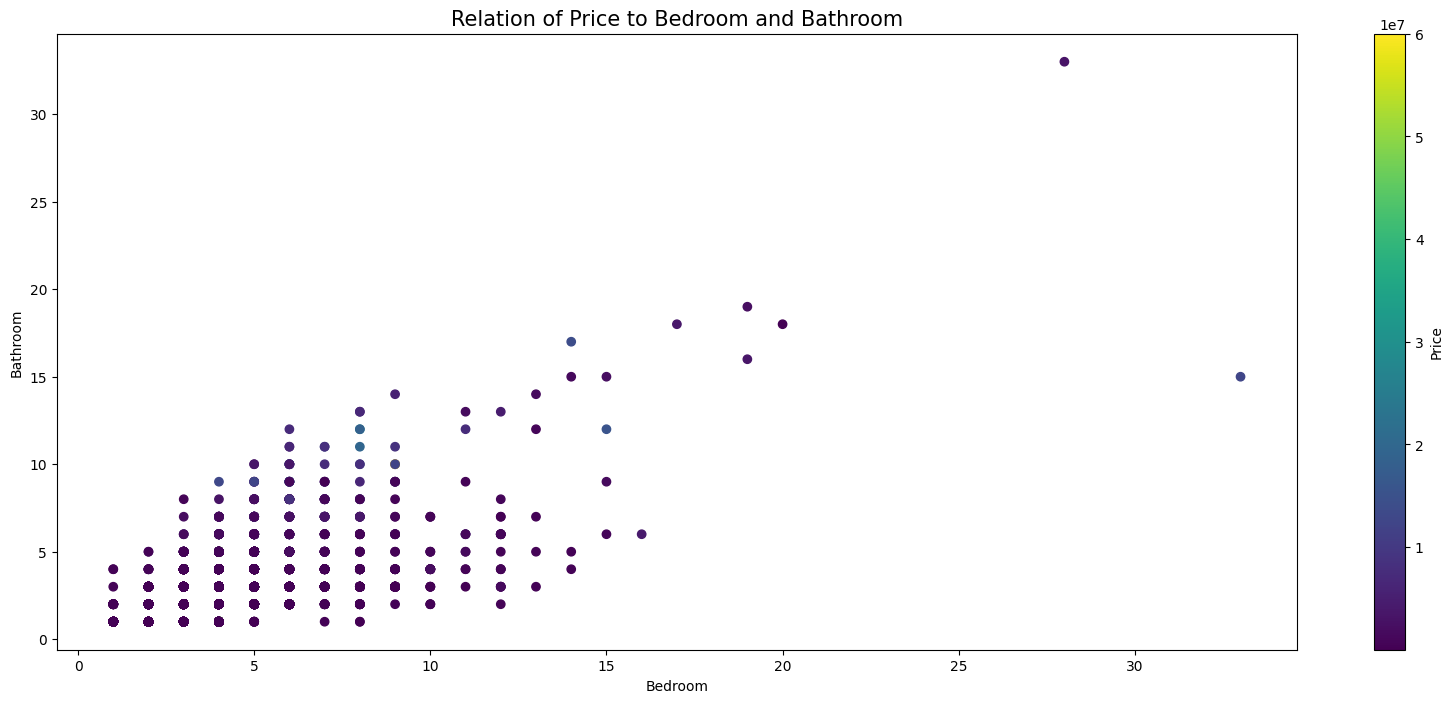

In [10]:
plt.figure(figsize=(20, 8))
x, y, z = Data["bed"], Data["bath"], Data["price"]

sc = plt.scatter(x, y, c = z)
plt.xlabel("Bedroom")
plt.ylabel("Bathroom")
plt.colorbar(sc, label = "Price")
plt.title("Relation of Price to Bedroom and Bathroom", fontsize = 15)

Text(0.5, 1.0, 'Real Estate Distribution by Province')

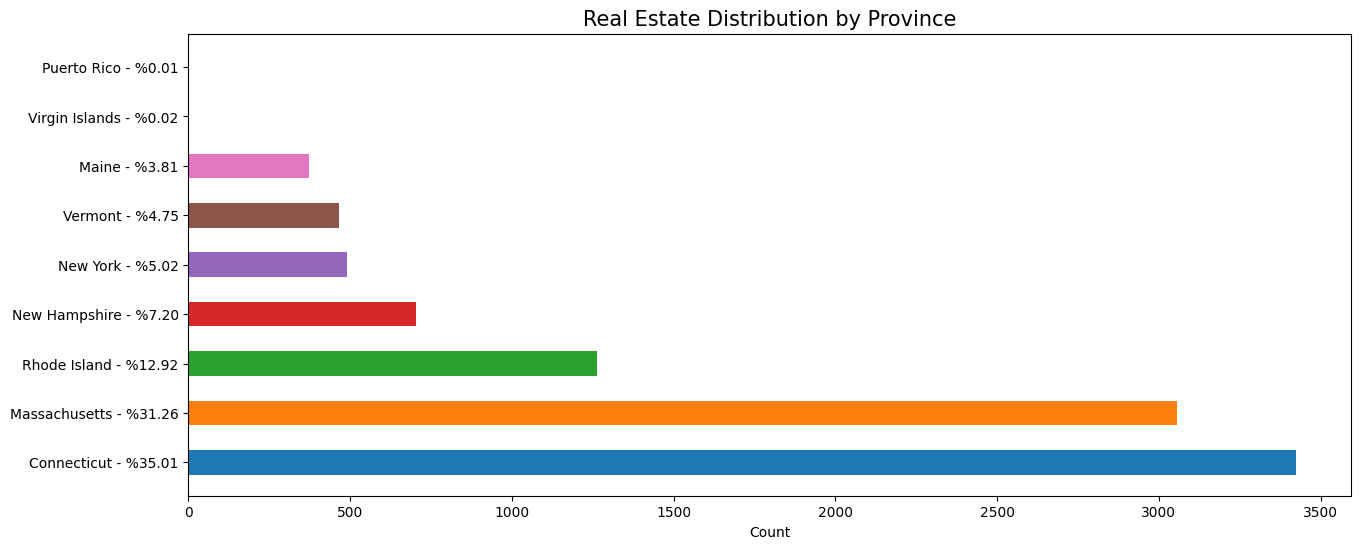

In [11]:
plt.figure(figsize = (15, 6))
stateCount = Data.value_counts("state")

for i, j in enumerate(bath):
    labels.append("{} - %{:.2f}".format(bath.index[i], 100*j/bath.sum()))

for i, j in enumerate(stateCount):
    label = "{} - %{:.2f}".format(stateCount.index[i], 100*j/stateCount.sum())
    plt.barh(label, j,height = 0.5)
    
plt.xlabel("Count")
plt.title("Real Estate Distribution by Province", fontsize = 15)

In [12]:
# I just create a new column with year value.
year = list()
for i in Data["sold_date"]:
    year.append(int(str(i)[:4]))
Data["year"] = year
Data.head(5)

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,year
0,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,2019
1,for_sale,950000.0,5.0,4.0,0.99,"46 Water Isle, Saint Thomas, VI, 00802",46 Water Isle,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11,2013
2,for_sale,6899000.0,4.0,6.0,0.83,"10 Water Isle, Saint Thomas, VI, 00802",10 Water Isle,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05,2018
3,for_sale,525000.0,3.0,3.0,0.45,"955 River Rd, Agawam, MA, 01001",955 River Rd,Agawam,Massachusetts,1001.0,2314.0,2014-06-25,2014
4,for_sale,289900.0,3.0,2.0,0.36,"82 Harvey Johnson Dr, Agawam, MA, 01001",82 Harvey Johnson Dr,Agawam,Massachusetts,1001.0,1276.0,2012-10-12,2012


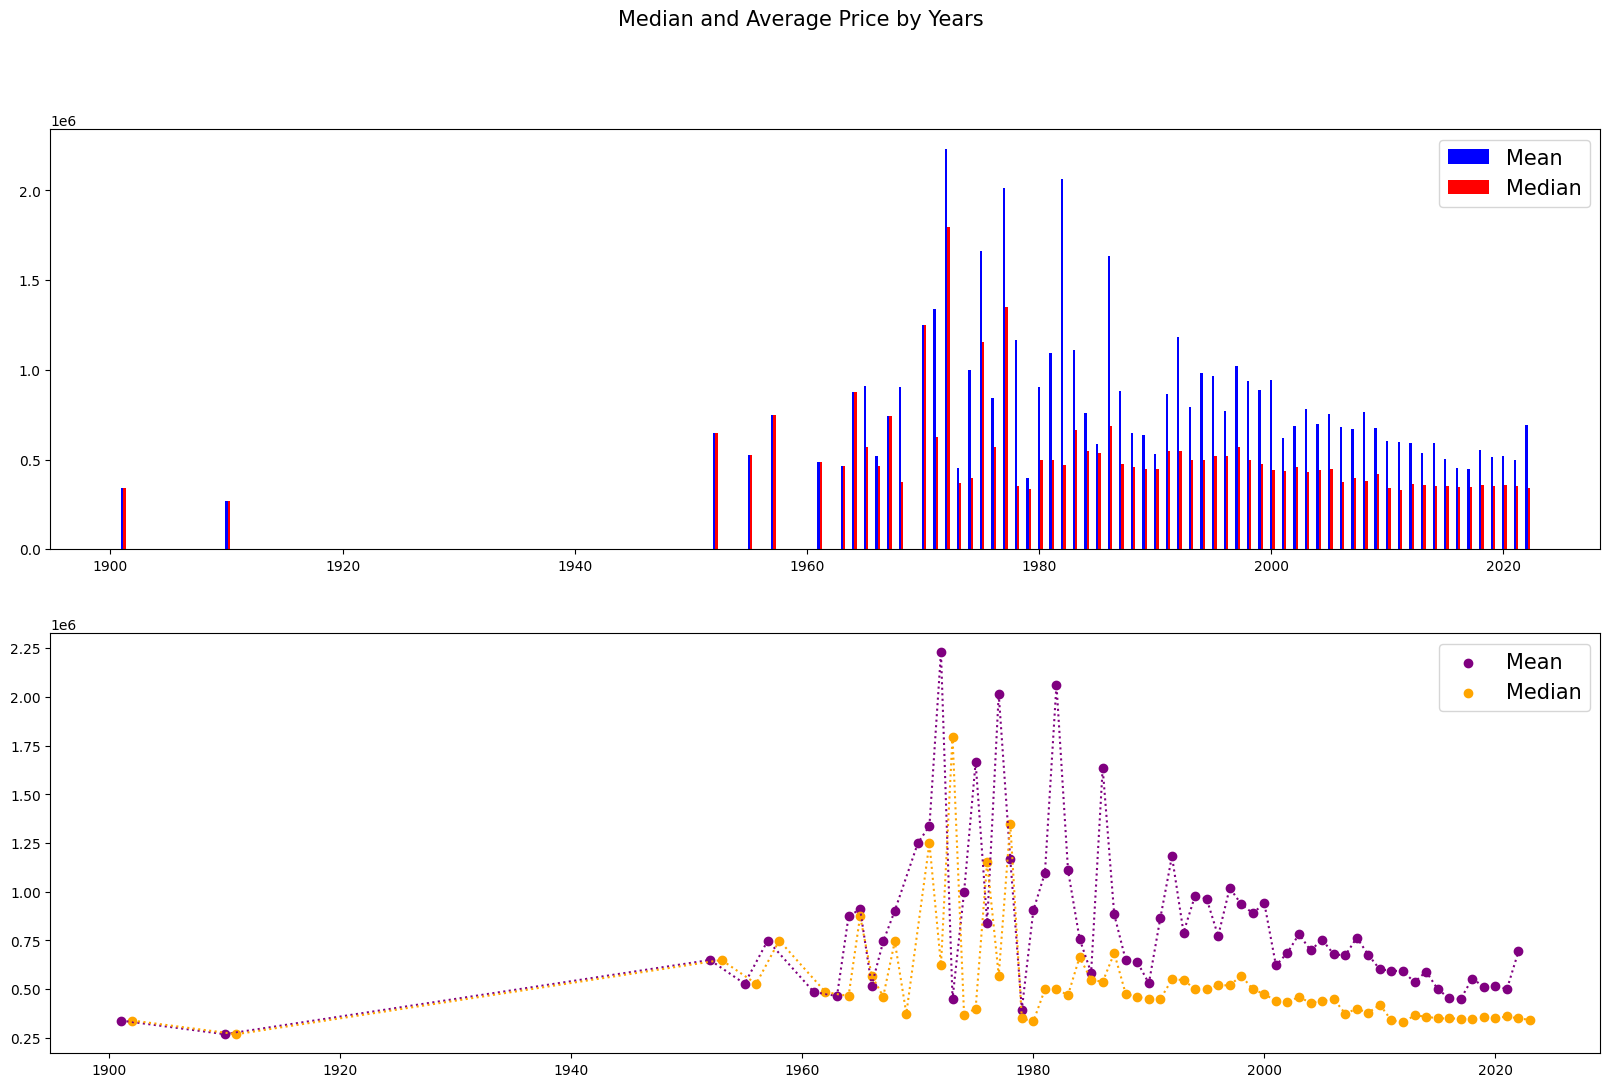

In [13]:
meanPrice = Data.groupby("year")["price"].mean()
medianPrice = Data.groupby("year")["price"].median()

meanPrice.index.sort_values(ascending = False)
medianPrice.index.sort_values(ascending = False)

plt.figure(figsize = (20, 12))
plt.suptitle("Median and Average Price by Years", fontsize = 15)

plt.subplot(2,1,1)
plt.bar(meanPrice.index, meanPrice, width = 0.2, color = "blue")
plt.bar(medianPrice.index+0.2, medianPrice, width = 0.2, color = "red")
plt.legend(["Mean", "Median"], fontsize = 15)

plt.subplot(2,1,2)
plt.scatter(meanPrice.index, meanPrice, color = "purple")
plt.scatter(medianPrice.index+1, medianPrice, color = "orange")
plt.plot(meanPrice.index, meanPrice, linestyle = ":", color = "purple")
plt.plot(medianPrice.index+1, medianPrice, linestyle = ":", color = "orange",)
plt.legend(["Mean", "Median"], fontsize = 15)



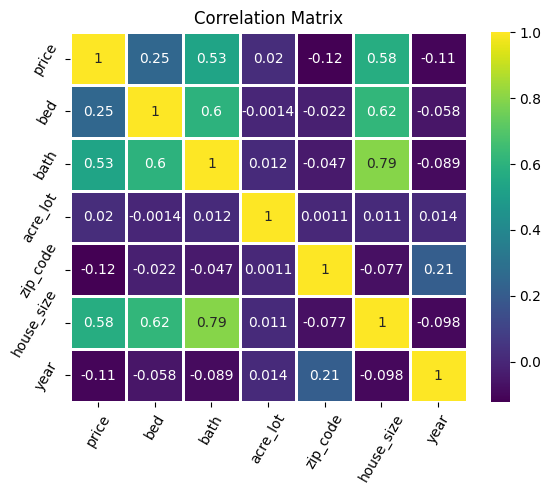

In [14]:
plt.figure(dpi=100)
plt.title('Correlation Matrix')
sns.heatmap(Data.corr(),annot=True,lw=1,linecolor='white',cmap='viridis')
plt.xticks(rotation=60)
plt.yticks(rotation = 60)
plt.show()

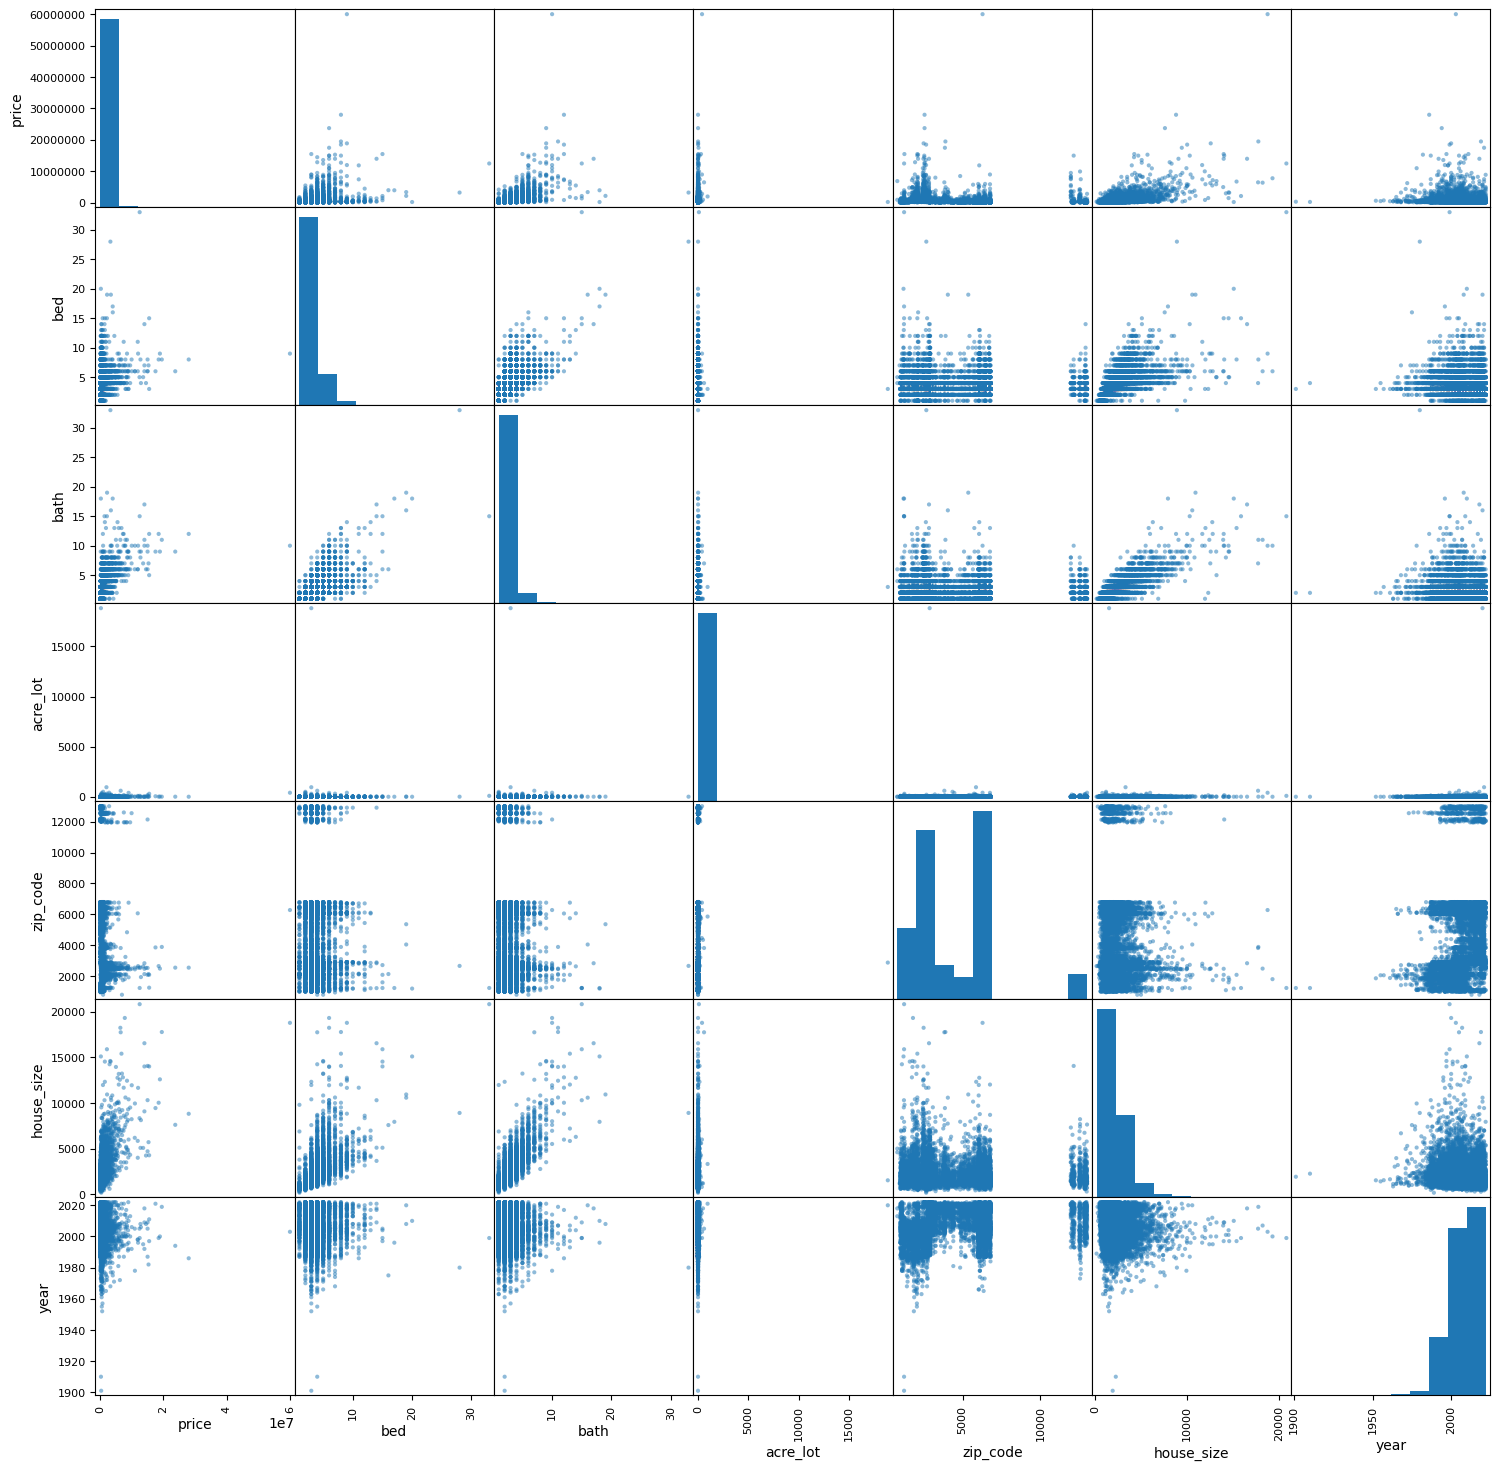

In [15]:
scaMat = pd.plotting.scatter_matrix(Data, alpha = 0.5, figsize=(18, 18), marker = ".")

# **Machine Learning**

In [16]:
LB = LabelEncoder()

Data["cityEnc"] = LB.fit_transform(Data["city"])
Data["stateEnc"] = LB.fit_transform(Data["state"])
Data

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,year,cityEnc,stateEnc
0,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,2019,191,5
1,for_sale,950000.0,5.0,4.0,0.99,"46 Water Isle, Saint Thomas, VI, 00802",46 Water Isle,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11,2013,638,8
2,for_sale,6899000.0,4.0,6.0,0.83,"10 Water Isle, Saint Thomas, VI, 00802",10 Water Isle,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05,2018,638,8
3,for_sale,525000.0,3.0,3.0,0.45,"955 River Rd, Agawam, MA, 01001",955 River Rd,Agawam,Massachusetts,1001.0,2314.0,2014-06-25,2014,4,2
4,for_sale,289900.0,3.0,2.0,0.36,"82 Harvey Johnson Dr, Agawam, MA, 01001",82 Harvey Johnson Dr,Agawam,Massachusetts,1001.0,1276.0,2012-10-12,2012,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9773,for_sale,299000.0,7.0,3.0,0.07,"94 Caroline St, Derby, CT, 06418",94 Caroline St,Derby,Connecticut,6418.0,1628.0,2018-11-29,2018,186,0
9774,for_sale,205000.0,4.0,3.0,0.14,"250 Myrtle St, Shelton, CT, 06484",250 Myrtle St,Shelton,Connecticut,6484.0,1575.0,2006-02-23,2006,667,0
9775,for_sale,385000.0,3.0,3.0,1.85,"233 S Main St, Seymour, CT, 06483",233 S Main St,Seymour,Connecticut,6483.0,1716.0,2015-10-27,2015,660,0
9776,for_sale,699999.0,4.0,3.0,0.75,"265 S Brooksvale Rd, Cheshire, CT, 06410",265 S Brooksvale Rd,Cheshire,Connecticut,6410.0,2340.0,1999-01-27,1999,135,0


## **Train - Test Place**

In [17]:
x = Data[["bed", "bath", "acre_lot", "stateEnc","zip_code", "house_size"]]
y = Data[["price"]]

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.33, random_state = 0)

## **Linear Regression**

In [18]:
LR = LinearRegression()
LR.fit(xTrain, yTrain)
predLR = LR.predict(xTest)


# **Decision Tree Regressor**

In [19]:
DT = DecisionTreeRegressor(random_state = 0)  
DT.fit(xTrain, yTrain)
predDT = DT.predict(xTest)


## **Random Forest Regressor**

In [20]:
RF = RandomForestRegressor(n_estimators = 10, random_state=0)
RF.fit(xTrain , yTrain.values.ravel())
predRF = RF.predict(xTest)


## **R-squared Scores**

Linear Regression R-squared Score        : 0.32131943755366243
Decision Tree Regressor R-squared Score  : 0.20816632089022413
Random Forest Regressor R-squared Score  : 0.5262365180746691


Text(0.5, 1.0, 'Scores')

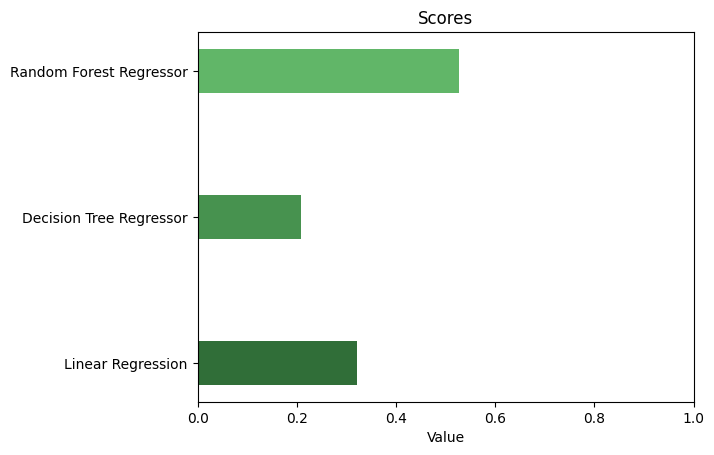

In [21]:
r2_0 = r2_score(yTest, predLR)
print("Linear Regression R-squared Score        : {}".format(r2_0))

r2_1 = r2_score(yTest, predDT)
print("Decision Tree Regressor R-squared Score  : {}".format(r2_1))

r2_2 = r2_score(yTest, predRF)
print("Random Forest Regressor R-squared Score  : {}".format(r2_2))

plt.barh(["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor"], [r2_0, r2_1, r2_2],
        height = 0.3, color = ["#306E38", "#47924F", "#61B668"])
plt.xlim(0, 1)
plt.xlabel("Value")
plt.title("Scores")